<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Linear Regression Exercise II

## 1.0 Simple Linear Regression

### Example

In [79]:
# Example 1
# ---
# Predict the percentage of marks that a student is expected to score 
# based upon the number of hours they studied
# ---
# 

In [80]:
# Importing our libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Importing the CSV dataset using pandas
# 
dataset = pd.read_csv('http://bit.ly/StudentDataset')
# dataset

In [82]:
# Exploring the dataset
# 
dataset.shape

(25, 2)

In [83]:
# Previewing the dataset
# 
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [84]:
# Showing the statistical details of the dataset
# 
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


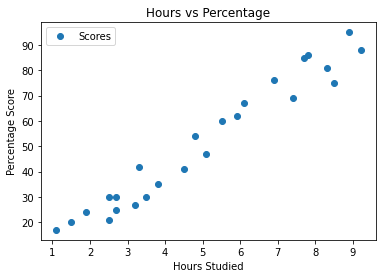

In [85]:
# Plotting to find any relationship between the variables
# 
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# We can clearly see that there is a positive linear relation 
# between the number of hours studied and percentage of score.

In [86]:
# Preparing the data
# ---
# Dividing the data into "attributes" and "labels". 
# Attributes are the independent variables while labels are dependent variables 
# whose values are to be predicted. In our dataset we only have two columns. 
# We want to predict the percentage score depending upon the hours studied. 
# Therefore our attribute set will consist of the "Hours" column, 
# and the label will be the "Score" column. To extract the attributes and labels,
# ---
# 
#X = dataset['Hours'].values.reshape(-1,1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X
# The attributes are stored in the X variable. We specified "-1" as the range for columns 
# since we wanted our attribute set to contain all the columns except the last one, 
# which is "Scores". Similarly the y variable contains the labels. 
# We specified 1 for the label column since the index for "Scores" column is 1. 
# Remember, the column indexes start with 0, with 1 being the second column. 

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [87]:
# Splitting the data
# ---
# The next step is to split this data into training and test sets. 
# We'll do this by using Scikit-Learn's built-in train_test_split() method
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above script splits 80% of the data to training set while 20% of the data to test set. 
# The test_size variable is where we actually specify the proportion of test set.

In [88]:
# Training the Algorithm
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# With Scikit-Learn it is extremely straight forward to implement linear regression models, 
# as all you really need to do is import the LinearRegression class, instantiate it, 
# and call the fit() method along with our training data. 
# This is about as simple as it gets when using a machine learning library to train on your data.

LinearRegression()

In [89]:
# Getting the intercept and slope
# ---
# In the theory section we said that linear regression model basically 
# finds the best value for the intercept and slope, which results in a line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, execute the following code.
# ---
# 

# intercept
# 
print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

# From the output of this cell, it means that for every one unit of change in hours studied, 
# the change in the score is about 9.91%. Or in simpler words, 
# if a student studies one hour more than they previously studied for an exam, 
# they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

2.018160041434683
[9.91065648]


In [90]:
# Making Predictions
# ---
# Now that we have trained our algorithm, it's time to make some predictions. 
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 
# To make pre-dictions on the test data, execute the following
# ---
# 

# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test series.
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We will note from the output that though our model is not very precise, 
# the predicted percentages are close to the actual ones.

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [91]:
# Evaluating the Algorithm
# ---
# The final step is to evaluate the performance of algorithm. 
# This step is particularly important to compare how well different algorithms perform on a particular dataset. 
# For regression algorithms, three evaluation metrics are commonly used:
# 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
# 2. Mean Squared Error (MSE) is the mean of the squared errors.
# 3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# ---
# The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
# Let's find the values for these metrics using our test data. ""
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# From the output, we will see that the value of root mean squared error is 4.64, 
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
# This means that our algorithm did a decent job.

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### <font color="green">Challenges</font>

In [92]:
# Challenge 1
# ---
# The given dataset contains average masses for women as a function 
# of their height in a sample of American women of age 30–39.
# Create a simple linear regression model outlining its accuracy.
# ---
# Dataset url = http://bit.ly/HeightsandWeightsDataset
# ---
# 
women = pd.read_csv('http://bit.ly/HeightsandWeightsDataset')
women

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [93]:
X = women['Height'].values.reshape(-1,1)
y = women['Weight'].values
y

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:

# intercept
# 
print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

2.018160041434683
[9.91065648]


In [96]:
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,53.12,16.884145
1,59.93,18.172530
2,63.11,18.668063


In [97]:


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 40.811754067935595
Mean Squared Error: 1677.2697558241905
Root Mean Squared Error: 40.95448395260512


In [98]:
# Challenge 2
# ---
# Create linear regression model to predict salaries given a dataset with salaries data.
# ---
# Dataset url = http://bit.ly/SalariesDataset
# ---
# 
salaries = pd.read_csv('http://bit.ly/SalariesDataset')
salaries

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 2.0 Multiple Linear Regression

### Example

In [99]:
# Example 2
# ---
# Predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), 
# per capita income (dollars), paved highways (in miles) and the proportion of population that has a license.
# ---
# In the first example we performed linear regression involving two variables. 
# Almost all real world problems that you are going to encounter will have more than two variables. 
# Linear regression involving multiple variables is called "multiple linear regression". 
# The steps to perform multiple linear regression are almost similar to that of simple linear regression. 
# The difference lies in the evaluation. 
# You can use it to find out which factor has the highest impact on the predicted output 
# and how different variables relate to each other.
# 

In [100]:
# Importing the Libraries
# 

In [101]:
# Loading our dataset
#
dataset = pd.read_csv('http://bit.ly/PetroleumDataset')


In [102]:
# Previewing the dataset
# 
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [103]:
# Previewing the statistical details of the dataset
# 
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [104]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
# 

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']


In [105]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [107]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# From the output, this means that for a unit increase in "petrol_tax", 
# there is a decrease of 24.19 million gallons in gas consumption. 
# Similarly, a unit increase in proportion of population with a drivers license 
# results in an increase of 1.324 billion gallons of gas consumption. 
# We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [108]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [109]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 60.07, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


### <font color="green">Challenges</font>

In [110]:
# Challenge 1
# ---
# Given the following real estate dataset, create a regression model
# to predict the price of a house.
# ---
# Dataset Source = https://bit.ly/RealEstate_Dataset
# ---
# 
house = pd.read_csv('https://bit.ly/RealEstate_Dataset')
house.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [111]:
house.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=house.drop(['Y house price of unit area','No','X1 transaction date','X5 latitude','X6 longitude' ], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                                 features  vif_Factor
0                            X2 house age    2.775991
1  X3 distance to the nearest MRT station    1.525476
2         X4 number of convenience stores    2.050093


In [113]:
cols = list(vif['features'])
cols

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores']

In [114]:
X = house[cols]
y = house['Y house price of unit area']

In [115]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [116]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


In [117]:
# Challenge 2
# ---
# Predict the critical temperature based on the features extracted in the given dataset
# ---
# Dataset source = http://bit.ly/SuperConductorDataset
# ---
# 
# temp = pd.read_csv('http://bit.ly/SuperConductorDataset')
# temp